In [11]:
import tensorflow as tf
print("TensorFlow:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow: 2.19.0
GPUs: []


In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
!ls "/content/drive/MyDrive"


'Colab Notebooks'		  schedul.gsheet
'deep learning'			  schedul.xlsx
'Google Earth'			  shoaib
 invoicing			 'Untitled document.gdoc'
 job_applicants.xlsx		 'What-is-AI-how-does-it-work (1).jpg'
 n8n				 'What-is-AI-how-does-it-work (2).jpg'
 OIP.sW02IxviDE91yYKhEFTP-wHaE8  'What-is-AI-how-does-it-work (3).jpg'
'schedul (1).gsheet'		  What-is-AI-how-does-it-work.jpg


In [31]:
!ls "/content/drive/MyDrive/deep learning"


dataset  PlantVillage.zip


In [32]:
dataset_path = "/content/drive/MyDrive/deep learning/dataset/PlantVillage"   # yahan apne unzip folder ka path do


In [33]:
import os
print("Path exists:", os.path.exists("/content/drive/MyDrive/deep learning/dataset/PlantVillage"))


Path exists: True


In [37]:
dataset_path = "/content/drive/MyDrive/deep learning/dataset/PlantVillage/PlantVillage"

subdirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path,d))]
print("Number of subfolders (classes):", len(subdirs))
print("First few subfolders:", subdirs[:10])


Number of subfolders (classes): 3
First few subfolders: ['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']


In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [39]:
img_size = 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,         # normalize pixels
    validation_split=0.2,   # 20% data validation
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1715 images belonging to 3 classes.
Found 428 images belonging to 3 classes.


In [44]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')   # 3 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5139 - loss: 0.9047 - val_accuracy: 0.8224 - val_loss: 0.5246
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7953 - loss: 0.5261 - val_accuracy: 0.8551 - val_loss: 0.3435
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8494 - loss: 0.3804 - val_accuracy: 0.9229 - val_loss: 0.2115
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8794 - loss: 0.2900 - val_accuracy: 0.9346 - val_loss: 0.1724
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9365 - loss: 0.1853 - val_accuracy: 0.9533 - val_loss: 0.1470
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9405 - loss: 0.1517 - val_accuracy: 0.9206 - val_loss: 0.2142
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9488 - loss: 0.1580 - val_accuracy: 0.9579 - val_loss: 0.1292
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9612 - loss: 0.1157 - val_accuracy: 0.9299 - val_loss:

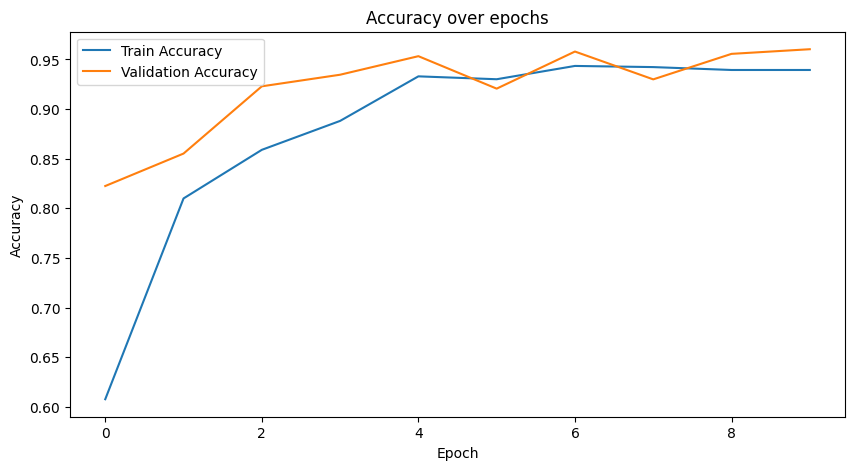

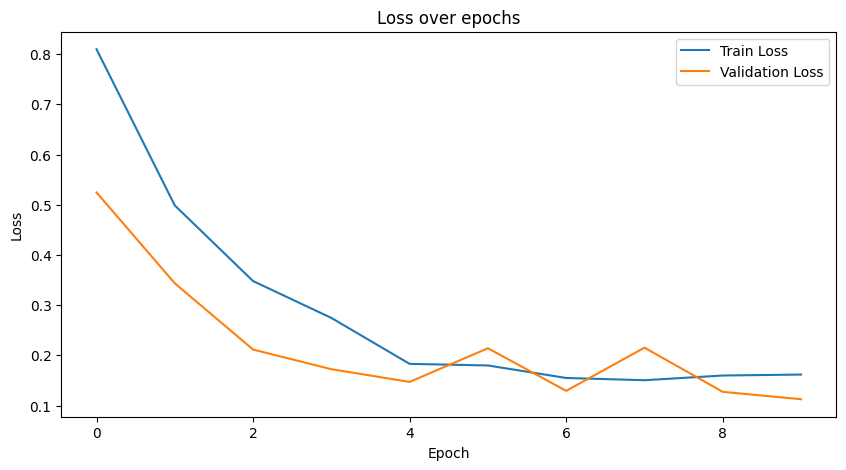

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [58]:
import os

folder = "/content/drive/MyDrive/deep learning/dataset/PlantVillage/PlantVillage/Potato___Late_blight"
print("Images in folder:")
print(os.listdir(folder)[:10])  # pehle 10 files print karega


Images in folder:
['0e7f0484-16eb-4183-b702-0a5b4f94d015___RS_LB 4000.JPG', '75a1ae7b-9b93-4a9f-9eca-70b4b9e9f5ff___RS_LB 4739.JPG', '74ee080b-cad8-4090-9f2a-07411eb8481a___RS_LB 4956.JPG', '1789b0d1-d850-4e04-8a20-bc3901d4ab0a___RS_LB 5251.JPG', '3f6bce87-fb66-44fb-8e76-e282af4869b9___RS_LB 3013.JPG', '37dbf454-f189-4fae-a9e7-a088e7be3f2e___RS_LB 4530.JPG', '36d2885d-0bc7-4346-8a13-383e1533a68c___RS_LB 5098.JPG', '2958c571-a4f9-40b3-a091-0f37c4822932___RS_LB 3325.JPG', '6be49d30-1b69-435a-a533-21b2b1a7fd41___RS_LB 3309.JPG', '77e2a857-e169-42f4-9886-708024781837___RS_LB 4705.JPG']


In [59]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# folder path
folder = "/content/drive/MyDrive/deep learning/dataset/PlantVillage/PlantVillage/Potato___Late_blight"

# pick first image
img_name = os.listdir(folder)[0]
img_path = os.path.join(folder, img_name)

print("Predicting for image:", img_name)

# load image
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# predict
pred = model.predict(img_array)
class_idx = np.argmax(pred)
labels = list(train_data.class_indices.keys())
print("Predicted Class:", labels[class_idx])


Predicting for image: 0e7f0484-16eb-4183-b702-0a5b4f94d015___RS_LB 4000.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted Class: Potato___Late_blight


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


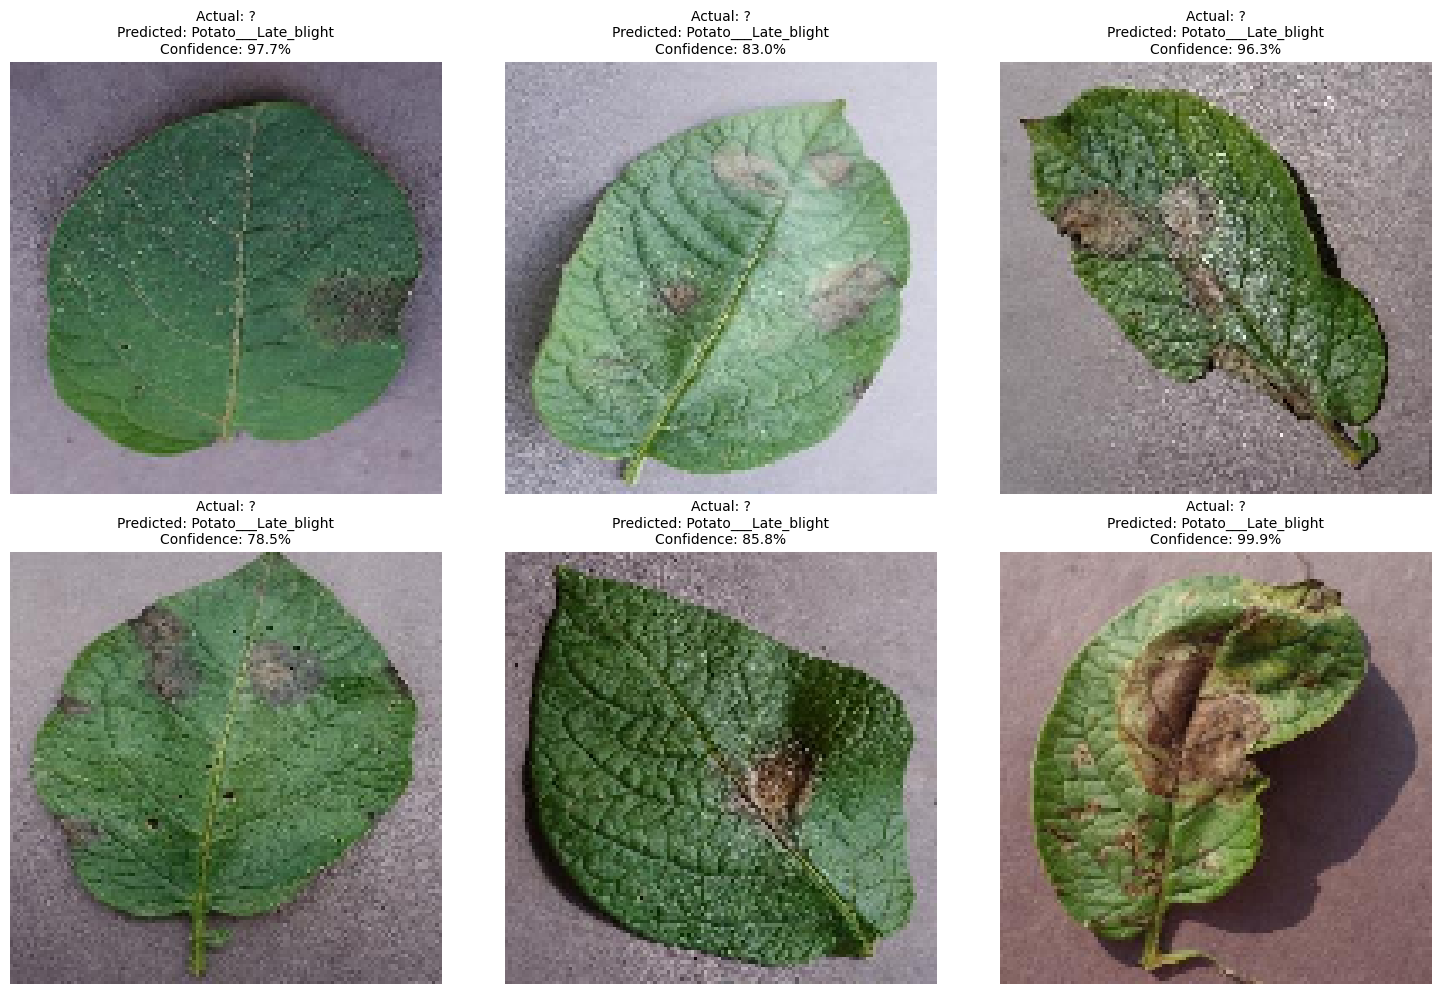

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Folder jahan images hain
folder = "/content/drive/MyDrive/deep learning/dataset/PlantVillage/PlantVillage/Potato___Late_blight"

# Pick first 6 images for demonstration
img_names = os.listdir(folder)[:6]

plt.figure(figsize=(15,10))

for i, img_name in enumerate(img_names):
    img_path = os.path.join(folder, img_name)
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = np.max(pred) * 100
    labels = list(train_data.class_indices.keys())

    # Plot
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: ?\nPredicted: {labels[class_idx]}\nConfidence: {confidence:.1f}%", fontsize=10)

plt.tight_layout()
plt.show()
